# P02: Probability

## Problem 1: The Gaussian distribution

Let us assume, we measure two quantities $y_1, y_2$ at locations $x_1, x_2$. We know that our observations are independent and each follows a Gaussian distribution with means $\mu_1, \mu_2$ and standard deviations $\sigma_1, \sigma_2$, i.e. $$P(y_1)=\frac{1}{\sqrt{2\pi}\sigma_1}e^{-\frac{(y_1-\mu_1)^2}{2\sigma_1^2}},$$ and $$P(y_2)=\frac{1}{\sqrt{2\pi}\sigma_2}e^{-\frac{(y_2-\mu_2)^2}{2\sigma_2^2}}.$$ We have that $\mu_1=0, \mu_2=2, \sigma_1=0.5, \sigma_2=2$, and the setup is illustrated in the plot below.

(i) What is the joint distribution $P(y_1, y_2)$ of $y_1, y_2$? Write down its analytical form.

$$P(y_1,y_2)=P(y_1) \cdot P(y_2)$$
$$P(y_1,y_2)=\frac{1}{\sqrt{2\pi}\sigma_1}e^{-\frac{(y_1-\mu_1)^2}{2\sigma_1^2}} \cdot \frac{1}{\sqrt{2\pi}\sigma_2}e^{-\frac{(y_2-\mu_2)^2}{2\sigma_2^2}}$$

Finally, we acquire:
$$P(y_1,y_2)=\frac{1}{\sqrt{2\pi}\sigma_1\sigma_2} e^{-\frac{(y_1-\mu_1)^2+(y_2-\mu_2)^2}{4\sigma_1^2\sigma_2^2}} \tag{1}  $$

(ii) Use `numpy` to draw $n$ samples of $y^i_1, y^i_2$ from this distribution. You can start with $n=100$ and see what happens if you increase $n$.

(iii) Use `matplotlib` to plot histograms of the samples. In particular, plot both the 2D histogram for $y_1, y_2$, as well as the two 1D histograms for $y_1$ and $y_2$.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

u=[0,2]
sigma=[[4,0],[0,0.25]]


#drawing the samples

def sampling(u,sigma,n):
    samples = np.random.multivariate_normal(u, sigma, n)
    return samples

#
def plotting(function,n):
    fig, axh = plt.subplots(ncols=2, figsize=(12, 3))
    axh[0].hist(function[:, 0], bins=100,  alpha=0.7, range=(-5,5), density=True)
    axh[0].set_title(r'$y_{1}$ n=%i' %n)
    axh[0].set_xlabel('Position')
    axh[0].set_ylabel('Frequency')

    axh[1].hist(function[:, 1], bins=100, alpha=0.7, range=(-5,5), density=True)
    axh[1].set_title(r'$y_{2}$ n=%i' %n)
    axh[1].set_xlabel('Position')
    axh[1].set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()


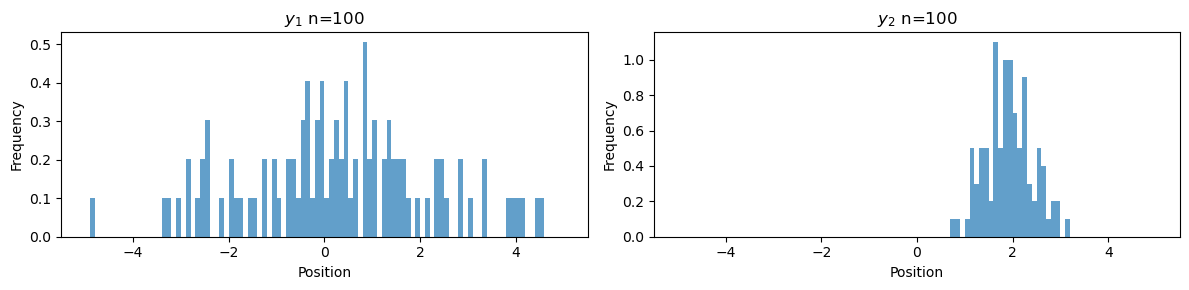

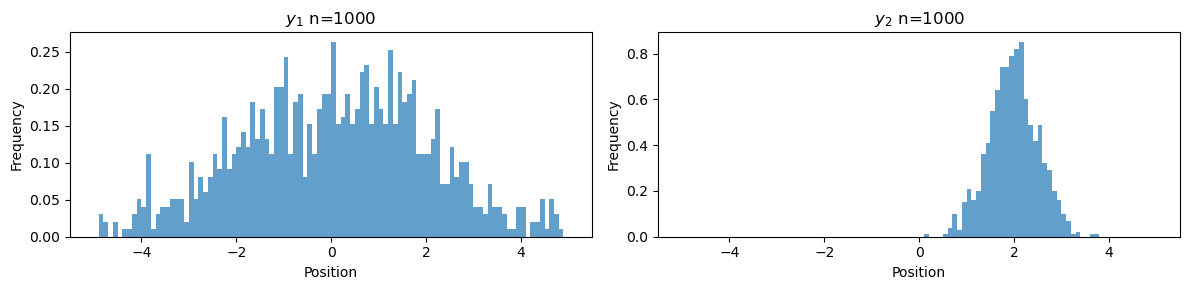

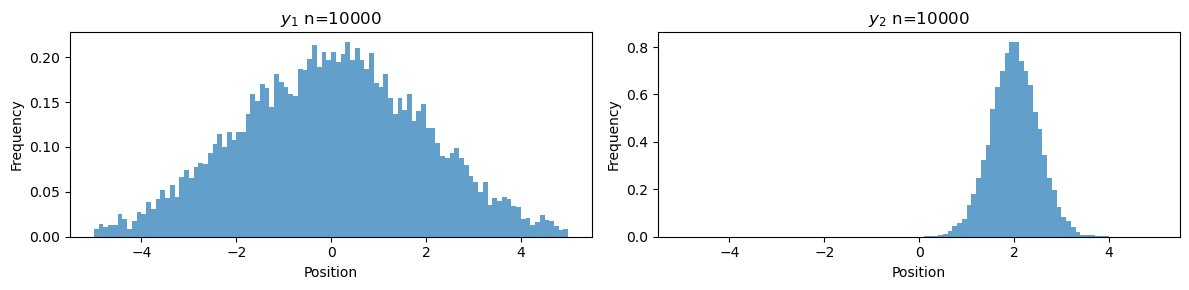

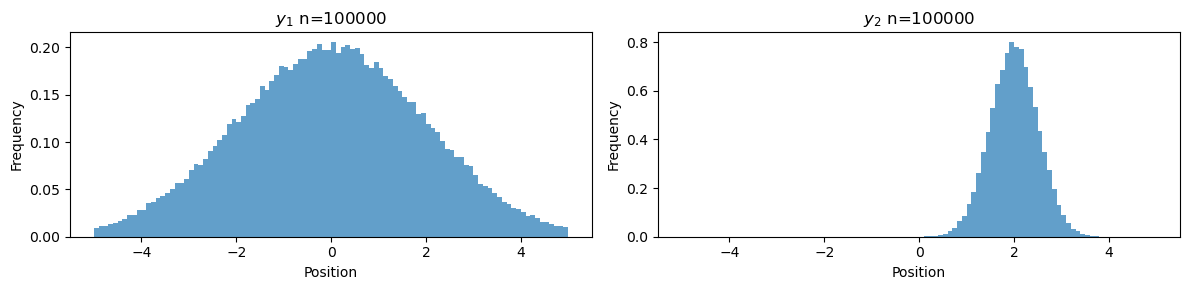

In [2]:
sample=plotting(sampling(u,sigma,100),100)
sample=plotting(sampling(u,sigma,1000),1000)
sample=plotting(sampling(u,sigma,10000),10000)
sample=plotting(sampling(u,sigma,100000),100000)

As we can see, with increased size of sampling, histograms represent smoother and more visible characteristic "bell curve".
Also, given the different variance ($\sigma_1=0.5, \sigma_2=2$) graphs of $y_2$ with the $\sigma_2$ are much wider and with non-zero mean ($\mu_2=2$), graphs of $y_2$ are shifted in position towards that value, as expected.


(iii) Use `matplotlib` to plot histograms of the samples. In particular, plot both the 2D histogram for $y_1, y_2$, as well as the two 1D histograms for $y_1$ and $y_2$.

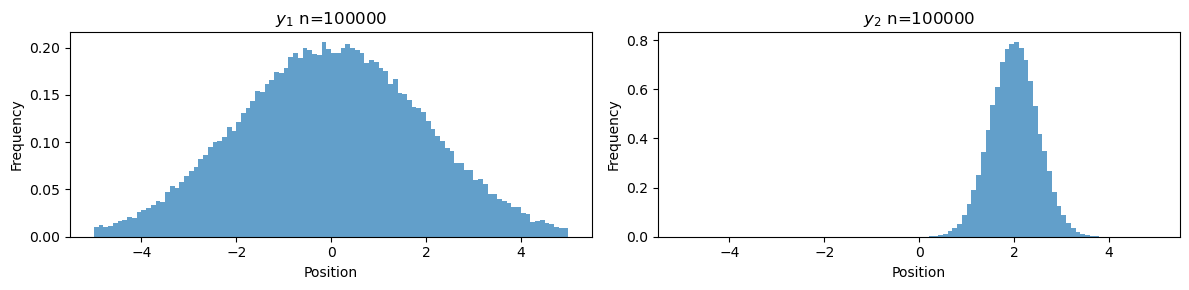

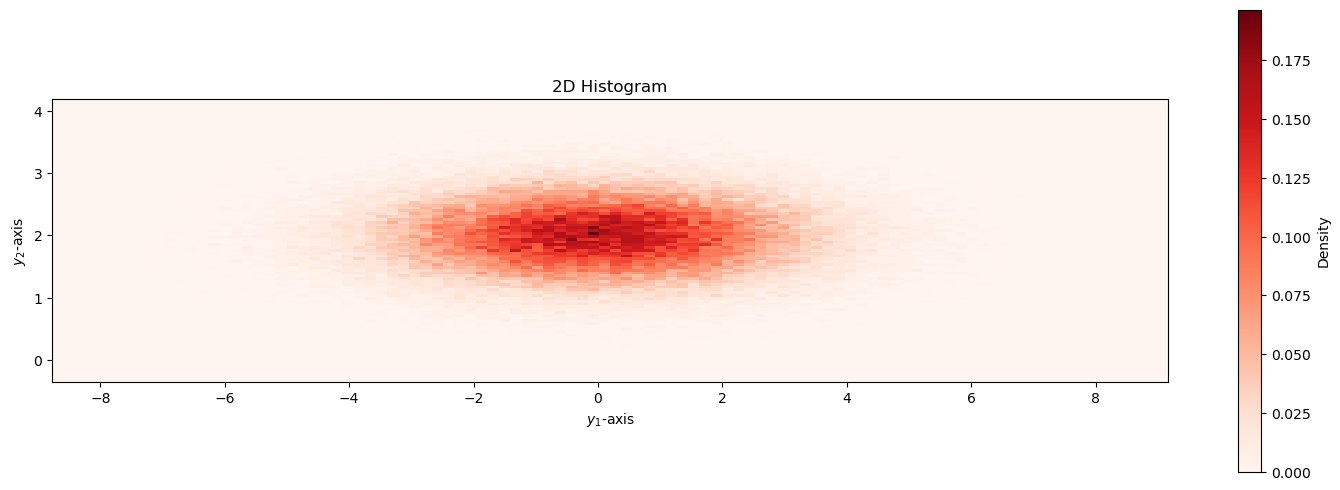

In [8]:
def plotting2D(function):
    hist, xedges, yedges = np.histogram2d(function[:,0], function[:,1], bins=100, density=True)
    
    fig, ax = plt.subplots(figsize=(18,6))
    X, Y = np.meshgrid(xedges, yedges)
    c = ax.pcolormesh(X, Y, hist.T, shading='auto', cmap='Reds')
    fig.colorbar(c, ax=ax, label='Density')
    ax.set_aspect('equal', 'box')
    
    
    plt.xlabel('$y_1$-axis')
    plt.ylabel('$y_2$-axis')
    plt.title('2D Histogram')
    plt.show()
kappa=sampling(u,sigma,100000)
plot1D=plotting(kappa,100000)
plot2D=plotting2D(kappa)

Visible distortion on the 2D histogram is the result of very "thin" sample of $y_2$, as we can compare from related histogram. Also by calling the minimal value from sample $y_1$, we can further support that reasoning.

(iv) Use `matplotlib` to obtain a contour plot from the 2D samples. Overplot it on your 2D historgram and compare.


In [ ]:
def Contouring(function):
    hist, xedges, yedges = np.histogram2d(function[:,1], function[:,0], bins=100, density=True)
    X, Y = np.meshgrid(xedges[:-1], yedges[:-1])
    fig, ax = plt.subplots(figsize=(18, 6))
    c = ax.pcolormesh(X, Y, hist.T, shading='auto', cmap='Reds')
    fig.colorbar(c, ax=ax, label='Density')
    
    contour = ax.contour(X, Y, hist.T, levels=10, colors='black', linewidths=0.5)  
    ax.clabel(contour, inline=True, fontsize=8)

    ax.set_aspect('equal', 'box')


    plt.xlabel('$y_2$-axis')
    plt.ylabel('$y_1$-axis')
    plt.title('2D Histogram with Contour')
    plt.show()


plot2D = Contouring(kappa)

(v) Derive an analytic expectation for the 1D histograms of $y_1$ and $y_2$ (what distribution are you plotting in this case?). Compare to your findings above. 


From numpy function $random.multivariate$_$ normal$, distribution is characterized exactly as:

$$P(y_1,y_2)=\frac{1}{\sqrt{2\pi |C|}} e^{-\frac{1}{2}(\vec{y}-\vec{\mu})^T C^{-1}(\vec{y}-\vec{\mu})}$$

Where
 $$C=\begin{pmatrix}
\sigma_1^2 & r\sigma_1\sigma_2  \\
r\sigma_1\sigma_2 & \sigma_2^2 \end{pmatrix}$$
$$\vec{y}=\begin{pmatrix}
y_1  \\
y_2 \end{pmatrix}$$

$$\vec{\mu}=\begin{pmatrix}
\mu_1  \\
\mu_2 \end{pmatrix}$$

Where $r$ is covariance coefficient. By calculating $|C|$ we get:

$$P(y_1,y_2)=\frac{1}{\sqrt{2\pi (\sigma_1^2 \sigma_2^2 -2 r\sigma_1\sigma_2)}} e^{-\frac{1}{2}(\vec{y}-\vec{\mu})^T C^{-1}(\vec{y}-\vec{\mu})} \tag{2}$$



By comparing equation (1) with acquired (2), we can get $r$ value, since normalizing components of two equations must be equal: 
$$\frac{1}{\sqrt{2\pi}\sigma_1\sigma_2} =\frac{1}{\sqrt{2\pi (\sigma_1^2 \sigma_2^2 -2 r\sigma_1\sigma_2)}}$$

$$\sigma_1^2 \sigma_2^2 -2 r\sigma_1\sigma_2=\sigma_1\sigma_2$$
$$\sigma_1 \sigma_2 -2 r=1$$
$$r=\frac{\sigma_1 \sigma_2 -1}{2}$$
And by given values of $\sigma_1=0.5$, $\sigma_2=2 $, our value $r$ is equal to: $$r=\frac{0.5 \cdot 2 -1}{2}=0$$


Calculating exponent value with given $r=0$:
$$-\frac{1}{2}(\begin{pmatrix}
y_1  \\
y_2 \end{pmatrix}- \begin{pmatrix}
\mu_1  \\
\mu_2 \end{pmatrix})^T \cdot \begin{pmatrix}
\sigma_1^2 & 0  \\
0 & \sigma_2^2 \end{pmatrix}^{-1} \cdot(\begin{pmatrix}
y_1  \\
y_2 \end{pmatrix}-\begin{pmatrix}
\mu_1  \\
\mu_2 \end{pmatrix})$$

$$-\frac{1}{2}\begin{pmatrix}
y_1 -\mu_1 ,
y_2 -\mu_2 \end{pmatrix}\cdot \frac{1}{\sigma_1^2 \sigma_2^2} \begin{pmatrix}
\sigma_2^2 & 0 \\
0 & \sigma_1^2 \end{pmatrix} \cdot \begin{pmatrix}
y_1 -\mu_1  \\
y_2 -\mu_2 \end{pmatrix}$$

$$-\frac{1}{2  \sigma_1^2 \sigma_2^2}
((y_1 -\mu_1)^2\sigma_2^2+2(y_2 -\mu_2)(y_1 -\mu_1)+(y_2 -\mu_2)^2\sigma_1^2)
$$

$$-(\frac{(y_1 -\mu_1)^2}{2\sigma_1^2}+\frac{(y_2 -\mu_2)(y_1 -\mu_1)}{\sigma_1^2\sigma_2^2}+\frac{(y_2 -\mu_2)^2}{2 \sigma_2^2}) \tag{3}
$$

Now by putting (3) into (2), we get:

$$P(y_1,y_2)=\frac{1}{\sqrt{2\pi} \sigma_1 \sigma_2} e^{-(\frac{(y_1 -\mu_1)^2}{2\sigma_1^2}+\frac{(y_2 -\mu_2)(y_1 -\mu_1)}{\sigma_1^2\sigma_2^2}+\frac{(y_2 -\mu_2)^2}{2 \sigma_2^2})} $$

To derive analytic expectation for $y_1$ or $y_2$ from 1D histograms, we assume that both are independent, thus we are plotting 1D Gaussian distribution: 

$$P(y_1)=\frac{1}{\sqrt{2\pi}\sigma_1}e^{-\frac{(y_1-\mu_1)^2}{2\sigma_1^2}},$$


(vi) Let us now assume that we are actually not interested in $y_1, y_2$ but in a linear transformation of these variables, $z_1, z_2$ defined as $$\boldsymbol{z}=A\boldsymbol{y},$$ where $$A=\begin{pmatrix}
1 & 0.2  \\
0.2 & 1 
\end{pmatrix}.$$ Using these new samples, repeat problems (i) to (v). What has changed compared to before? 

**Hint:** For (v) you can use the analytic expression for the 2D Gaussian we have discussed in class, i.e. $$\mathcal{N}(\boldsymbol{y}) = \frac{1}{\sqrt{(2\pi)^2|C|}}e^{-\frac{1}{2}(\boldsymbol{y}-\boldsymbol{\mu})^TC^{-1}(\boldsymbol{y}-\boldsymbol{\mu})},$$ with $$C = \begin{pmatrix}
\sigma^2_1 & r\sigma_1\sigma_2  \\
r\sigma_1\sigma_2 & \sigma^2_2 
\end{pmatrix}.$$

Text(0, 0.5, '$y$')

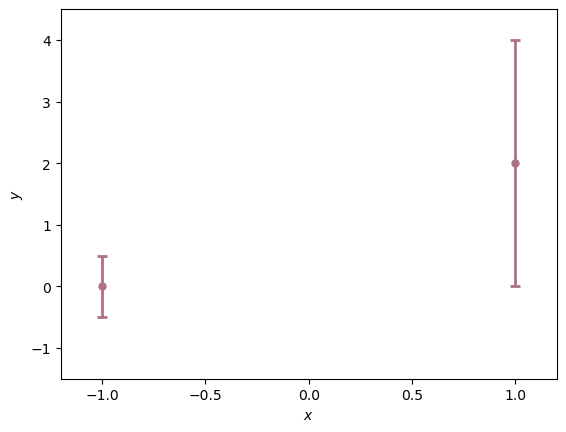

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.array([-1, 1])
mu = np.array([0, 2])
sigma  = np.array([0.5, 2])

plt.errorbar(x, mu, yerr=sigma, marker='.', linewidth=2, markersize=10, \
            elinewidth=2, capthick=2, capsize=3.5, linestyle='None', color='#AE7182')
plt.xlim(-1.2, 1.2)
plt.ylim(-1.5, 4.5)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

## Problem 2: The Monty Hall problem (taken from MacKay)

On a game show, a contestant is told the rules as follows:

There are three doors, labeled 1, 2, 3. A single prize has been hidden behind one of them. You get to select one door. Initially your chosen door will not be opened. Instead, the gameshow host will open one of the other two doors, and he will do so in such a way as not to reveal the prize. For example, if you first choose door 1, he will then open one of doors 2 and 3, and it is guaranteed that he will choose which one to open so that the prize will not be revealed.

At this point, you will be given a fresh choice of door: you can either stick with your first choice, or you can switch to the other closed door. All the doors will then be opened and you will receive whatever is behind your final choice of door.
Imagine that the contestant chooses door 1 first; then the gameshow host opens door 3, revealing nothing behind the door, as promised. 

Should the contestant 

(i) stick with door 1, 

(ii) switch to door 2, 

(ii) or does it make no difference?

Explain your solution and reasoning.

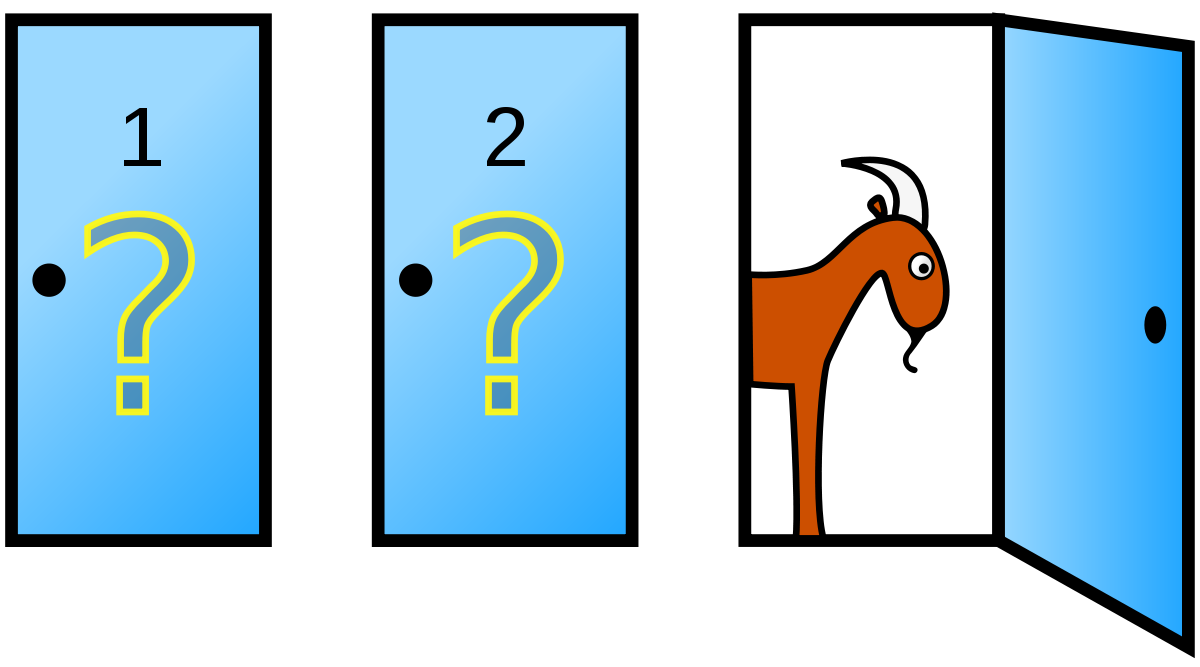